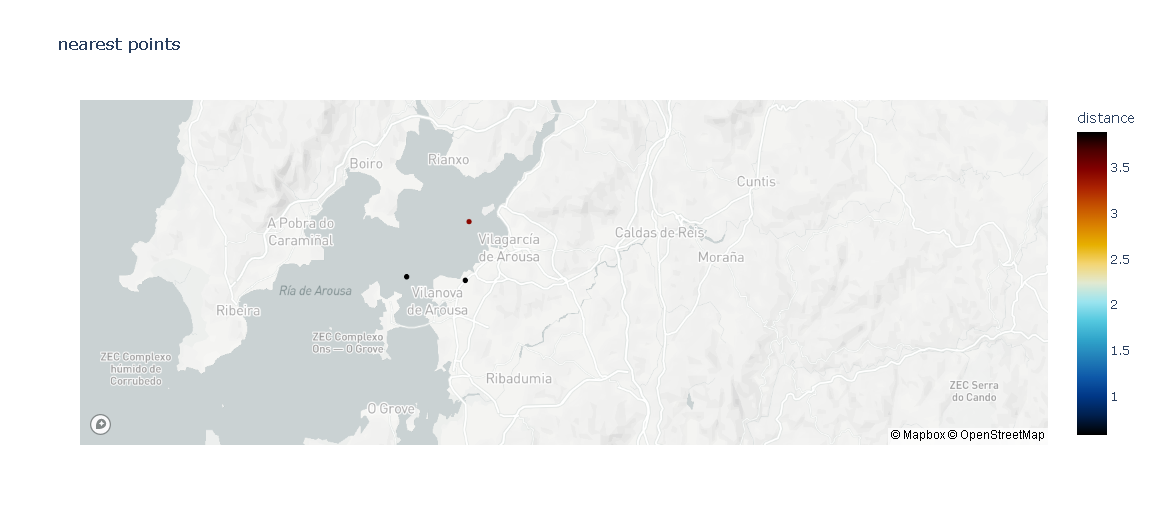

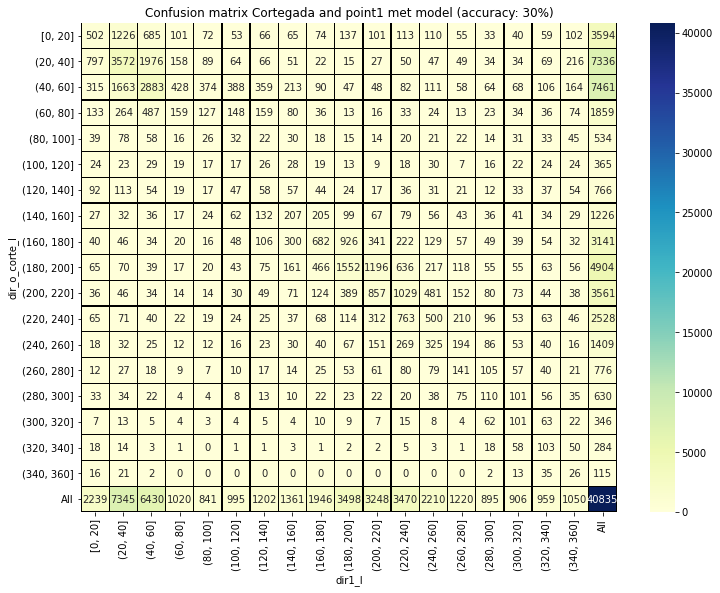

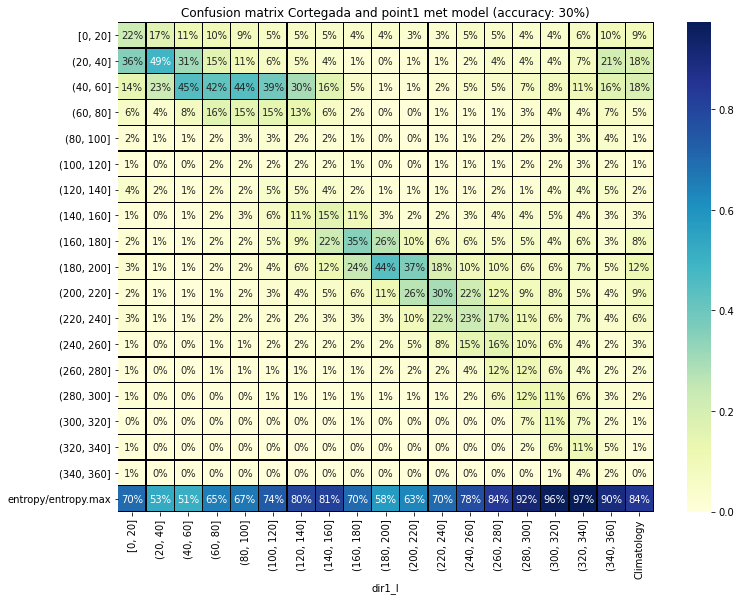

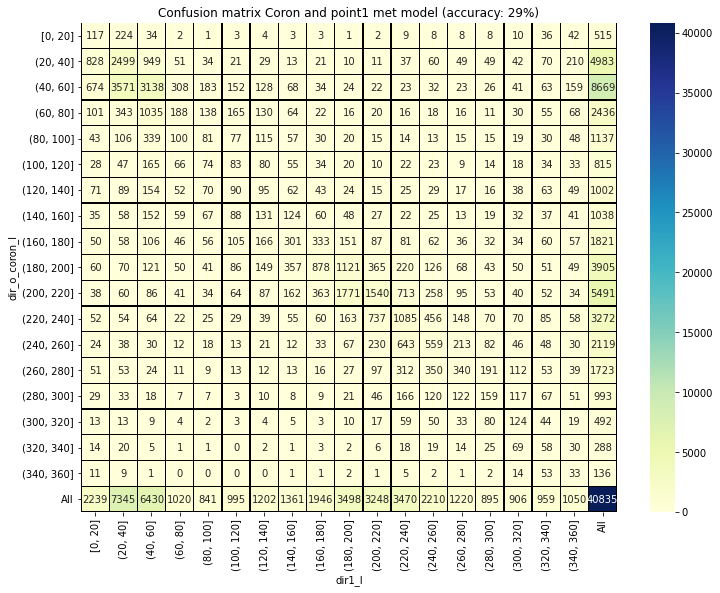

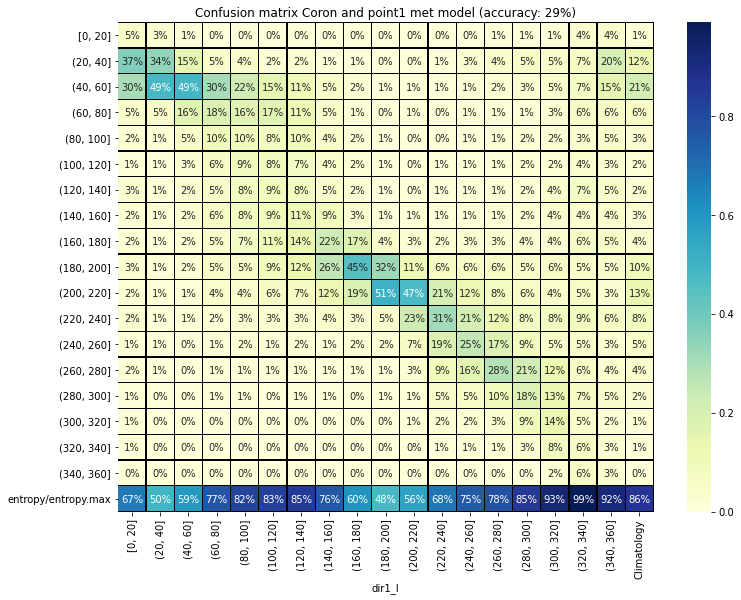

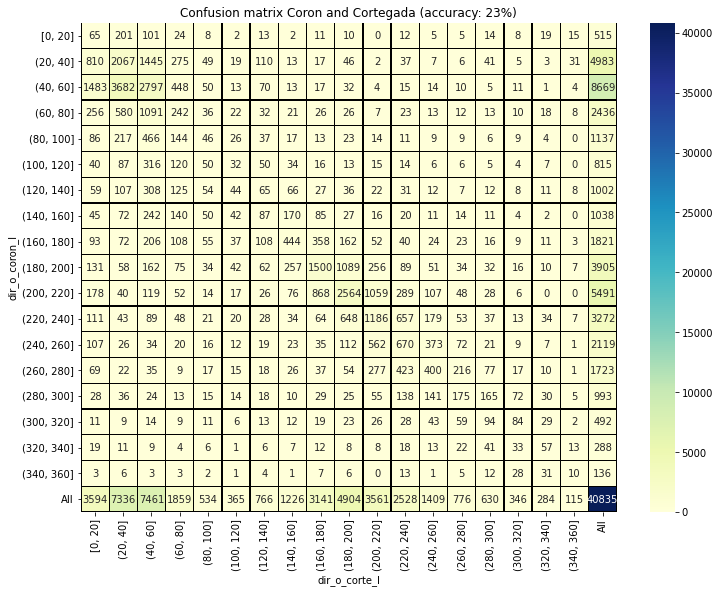

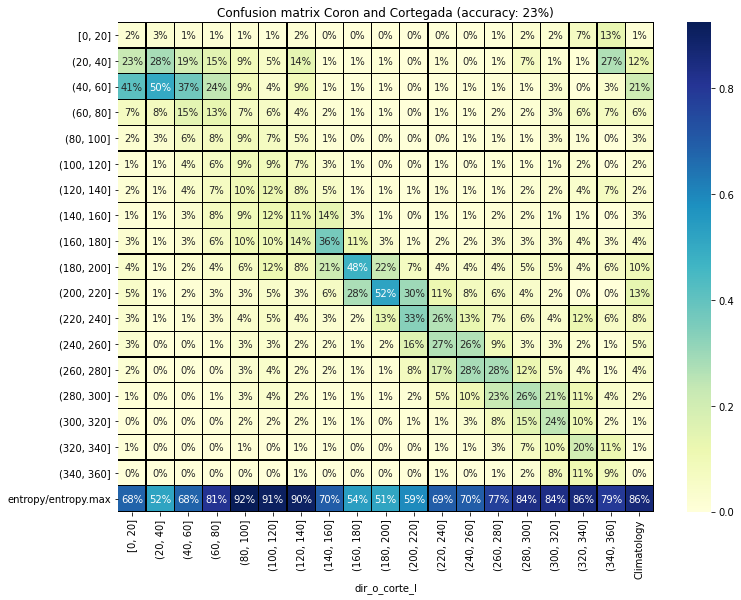

In [18]:
#@title Wind direction. Sampling method: traditional mean hour before
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import math
from scipy.stats import entropy
import seaborn as sns

#import data from cortegada, coron and meteorologic model point 1 redish.resample hour mean
corte = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Coron/station_data/cortegada.csv",usecols=["time","dir_o"], parse_dates=["time"]).set_index("time")
corte = corte.add_suffix('_corte').resample("H",label="right",closed="right").mean()
coron = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Coron/station_data/coron.csv",usecols=["time","dir_o"],parse_dates=["time"]).set_index("time")
coron = coron.add_suffix("_coron").resample("H",label="right",closed="right").mean()
met_model = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Coron/met_ model/lat42.58lon-8.8046p3R4KmD0.csv",
                        usecols=["dir1","time"], parse_dates=["time"]).set_index("time")
met_model.drop_duplicates()

#concatenate and label
df_res = pd.concat([corte,coron,met_model],axis=1).dropna()
interval=pd.IntervalIndex.from_tuples([(-0.5,20), (20, 40), (40, 60),
                                       (60,80),(80,100),(100,120),(120,140),(140,160),
                                       (160,180),(180,200),(200,220),(220,240),
                                       (240,260),(260,280),(280,300),(300,320),
                                       (320,340),(340,360)])
labels=['[0, 20]', '(20, 40]', '(40, 60]','(60, 80]', '(80, 100]', '(100, 120]',
        '(120, 140]','(140, 160]', '(160, 180]', '(180, 200]', '(200, 220]',
        '(220, 240]', '(240, 260]', '(260, 280]', '(280, 300]','(300, 320]',
        '(320, 340]', '(340, 360]']

#show new function        
df_res["dir_o_corte_l"] = pd.cut(df_res["dir_o_corte"], bins=interval,
                                 retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype('category')
df_res["dir_o_coron_l"] = pd.cut(df_res["dir_o_coron"], bins=interval,
                                 retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype('category')
df_res["dir1_l"] = pd.cut(df_res["dir1"], bins=interval,
                                 retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype('category')
#accuracy
acccorte_1 = accuracy_score(df_res.dir_o_corte_l, df_res.dir1_l)
acccoron_1 = accuracy_score(df_res.dir_o_coron_l, df_res.dir1_l)
acccoron_corte = accuracy_score(df_res.dir_o_coron_l, df_res.dir_o_corte_l)


#compare Cortegada and point1 met model
plt.figure(figsize=(12, 9))
plt.title("Confusion matrix Cortegada and point1 met model (accuracy: {:.0%})".format(acccorte_1))
global_sc = pd.crosstab(df_res.dir_o_corte_l, df_res.dir1_l,margins=True,)
sns.heatmap(global_sc,annot=True,cmap="YlGnBu",fmt='.0f',linewidths=.3, linecolor='black');

plt.figure(figsize=(12, 9))
plt.title("Confusion matrix Cortegada and point1 met model (accuracy: {:.0%})".format(acccorte_1))
column_sc = pd.crosstab(df_res.dir_o_corte_l, df_res.dir1_l, margins=True,normalize="columns")
column_sc = column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropy/entropy.max"],
                   index=column_sc.columns).T).rename(columns={"All":"Climatology"})
sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%',linewidths=.3, linecolor='black');


#compare Coron and point1 met model
plt.figure(figsize=(12, 9))
plt.title("Confusion matrix Coron and point1 met model (accuracy: {:.0%})".format(acccoron_1))
global_sc = pd.crosstab(df_res.dir_o_coron_l, df_res.dir1_l,margins=True,)
sns.heatmap(global_sc,annot=True,cmap="YlGnBu",fmt='.0f',linewidths=.3, linecolor='black');

plt.figure(figsize=(12, 9))
plt.title("Confusion matrix Coron and point1 met model (accuracy: {:.0%})".format(acccoron_1))
column_sc = pd.crosstab(df_res.dir_o_coron_l, df_res.dir1_l, margins=True,normalize="columns")
column_sc = column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropy/entropy.max"],
                   index=column_sc.columns).T).rename(columns={"All":"Climatology"})
sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%',linewidths=.3, linecolor='black');


#compare Coron and Cortegada
plt.figure(figsize=(12, 9))
plt.title("Confusion matrix Coron and Cortegada (accuracy: {:.0%})".format(acccoron_corte))
global_sc = pd.crosstab(df_res.dir_o_coron_l, df_res.dir_o_corte_l,margins=True,)
sns.heatmap(global_sc,annot=True,cmap="YlGnBu",fmt='.0f',linewidths=.3, linecolor='black');

plt.figure(figsize=(12, 9))
plt.title("Confusion matrix Coron and Cortegada (accuracy: {:.0%})".format(acccoron_corte))
column_sc = pd.crosstab(df_res.dir_o_coron_l, df_res.dir_o_corte_l, margins=True,normalize="columns")
column_sc = column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropy/entropy.max"],
                   index=column_sc.columns).T).rename(columns={"All":"Climatology"})
sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%',linewidths=.3, linecolor='black');


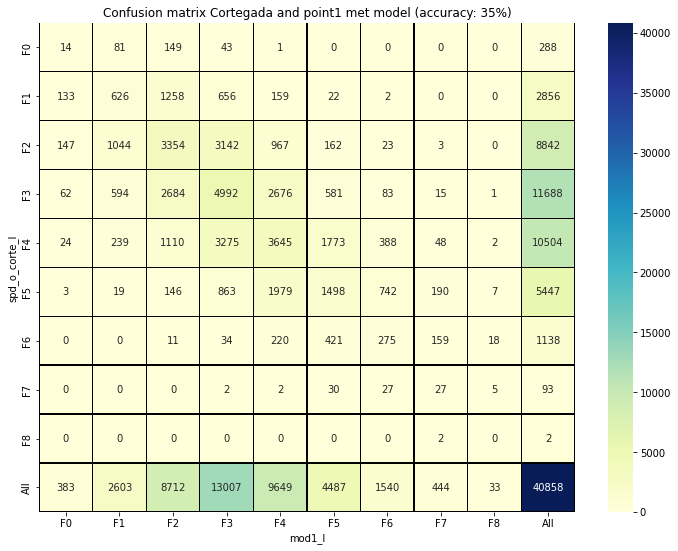

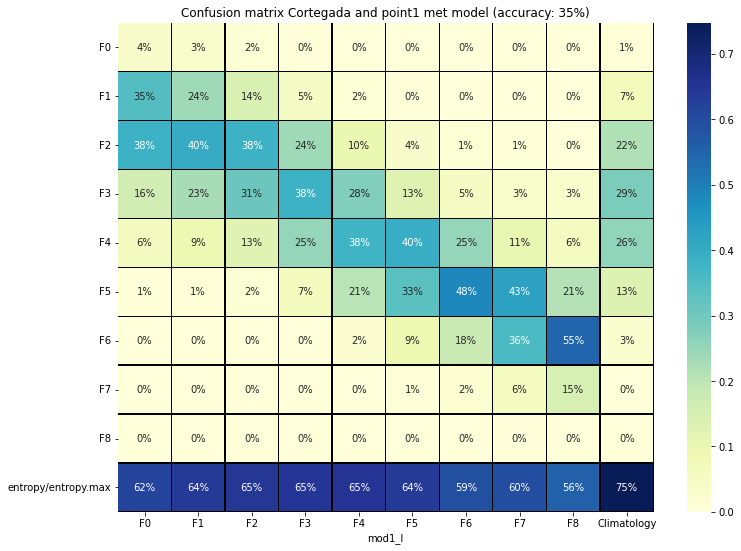

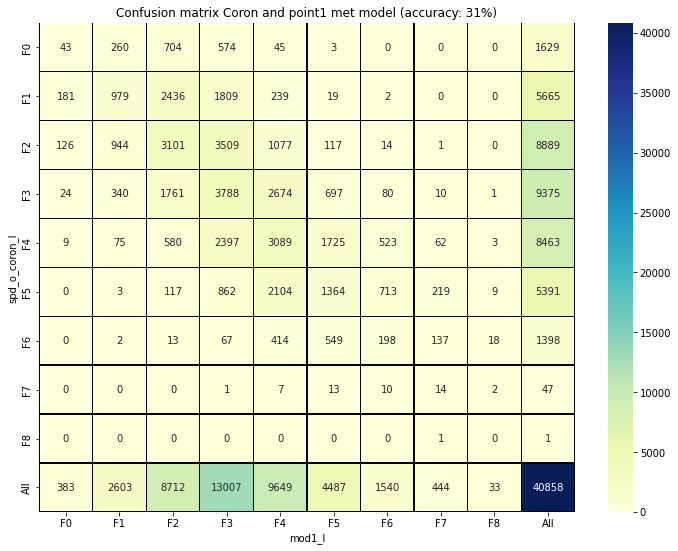

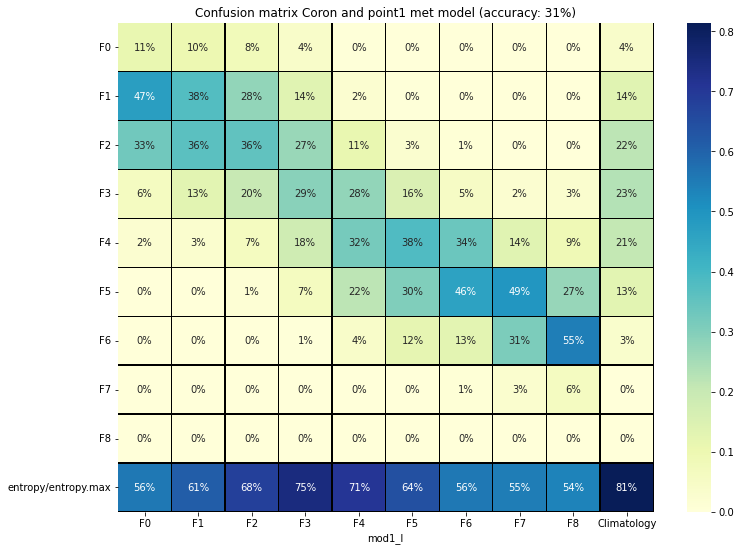

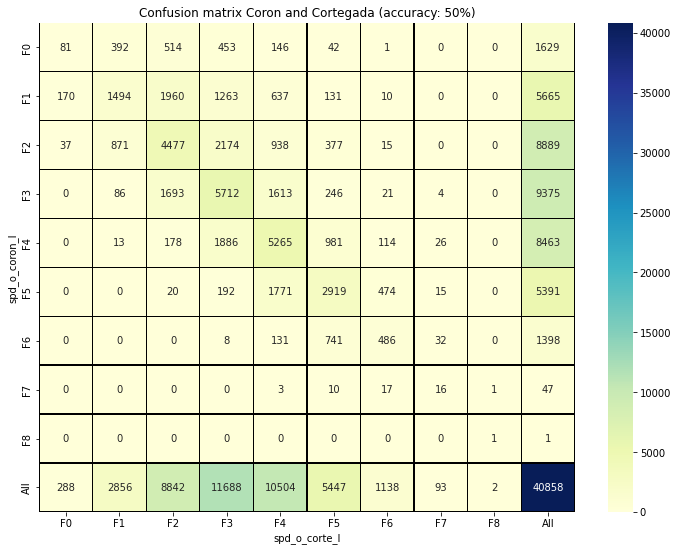

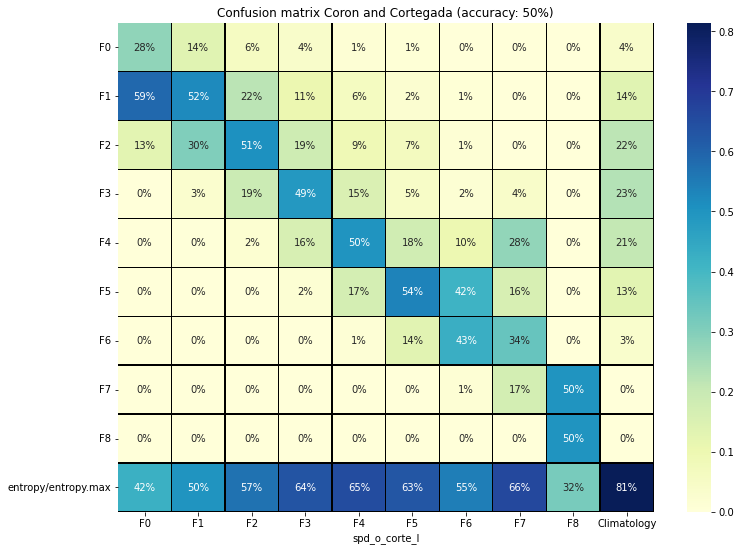

In [19]:
#@title Wind intensity Beaufort . Sampling method: traditional mean hour before

#import data from cortegada, coron and meteorologic model point 1 redish.resample hour mean
corte = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Coron/station_data/cortegada.csv",usecols=["time","spd_o"], parse_dates=["time"]).set_index("time")
corte = corte.add_suffix('_corte').resample("H",label="right",closed="right").mean()
coron = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Coron/station_data/coron.csv",usecols=["time","spd_o"],parse_dates=["time"]).set_index("time")
coron = coron.add_suffix("_coron").resample("H",label="right",closed="right").mean()
met_model = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Coron/met_ model/lat42.58lon-8.8046p3R4KmD0.csv",
                        usecols=["mod1","time"], parse_dates=["time"]).set_index("time")
met_model.drop_duplicates()

#concatenate and label
df_res = pd.concat([corte,coron,met_model],axis=1).dropna()
labels = ["F0","F1","F2","F3","F4","F5","F6","F7","F8","F9","F10","F11","F12"]
interval = pd.IntervalIndex.from_tuples([(-1, 0.5), (.5, 1.5), (1.5, 3.3),(3.3,5.5),
                                     (5.5,8),(8,10.7),(10.7,13.8),(13.8,17.1),
                                     (17.1,20.7),(20.7,24.4),(24.4,28.4),(28.4,32.6),(32.6,60)])

#show new function        
df_res["spd_o_corte_l"] = pd.cut(df_res["spd_o_corte"], bins=interval,
                                 retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype('category')
df_res["spd_o_coron_l"] = pd.cut(df_res["spd_o_coron"], bins=interval,
                                 retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype('category')
df_res["mod1_l"] = pd.cut(df_res["mod1"], bins=interval,
                                 retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype('category')
#accuracy
acccorte_1 = accuracy_score(df_res.spd_o_corte_l, df_res.mod1_l)
acccoron_1 = accuracy_score(df_res.spd_o_coron_l, df_res.mod1_l)
acccoron_corte = accuracy_score(df_res.spd_o_coron_l, df_res.spd_o_corte_l)


#compare Cortegada and point1 met model
plt.figure(figsize=(12, 9))
plt.title("Confusion matrix Cortegada and point1 met model (accuracy: {:.0%})".format(acccorte_1))
global_sc = pd.crosstab(df_res.spd_o_corte_l, df_res.mod1_l,margins=True,)
sns.heatmap(global_sc,annot=True,cmap="YlGnBu",fmt='.0f',linewidths=.3, linecolor='black');

plt.figure(figsize=(12, 9))
plt.title("Confusion matrix Cortegada and point1 met model (accuracy: {:.0%})".format(acccorte_1))
column_sc = pd.crosstab(df_res.spd_o_corte_l, df_res.mod1_l, margins=True,normalize="columns")
column_sc = column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropy/entropy.max"],
                   index=column_sc.columns).T).rename(columns={"All":"Climatology"})
sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%',linewidths=.3, linecolor='black');


#compare Coron and point1 met model
plt.figure(figsize=(12, 9))
plt.title("Confusion matrix Coron and point1 met model (accuracy: {:.0%})".format(acccoron_1))
global_sc = pd.crosstab(df_res.spd_o_coron_l, df_res.mod1_l,margins=True,)
sns.heatmap(global_sc,annot=True,cmap="YlGnBu",fmt='.0f',linewidths=.3, linecolor='black');

plt.figure(figsize=(12, 9))
plt.title("Confusion matrix Coron and point1 met model (accuracy: {:.0%})".format(acccoron_1))
column_sc = pd.crosstab(df_res.spd_o_coron_l, df_res.mod1_l, margins=True,normalize="columns")
column_sc = column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropy/entropy.max"],
                   index=column_sc.columns).T).rename(columns={"All":"Climatology"})
sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%',linewidths=.3, linecolor='black');


#compare Coron and Cortegada
plt.figure(figsize=(12, 9))
plt.title("Confusion matrix Coron and Cortegada (accuracy: {:.0%})".format(acccoron_corte))
global_sc = pd.crosstab(df_res.spd_o_coron_l, df_res.spd_o_corte_l,margins=True,)
sns.heatmap(global_sc,annot=True,cmap="YlGnBu",fmt='.0f',linewidths=.3, linecolor='black');

plt.figure(figsize=(12, 9))
plt.title("Confusion matrix Coron and Cortegada (accuracy: {:.0%})".format(acccoron_corte))
column_sc = pd.crosstab(df_res.spd_o_coron_l, df_res.spd_o_corte_l, margins=True,normalize="columns")
column_sc = column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropy/entropy.max"],
                   index=column_sc.columns).T).rename(columns={"All":"Climatology"})
sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%',linewidths=.3, linecolor='black');


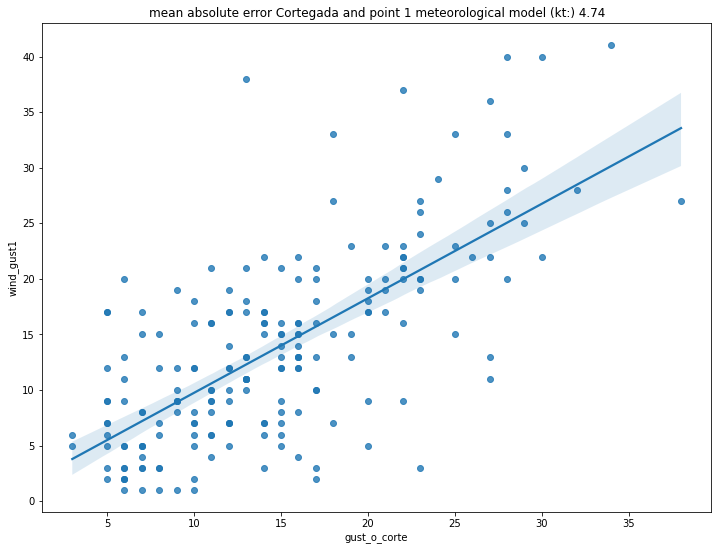

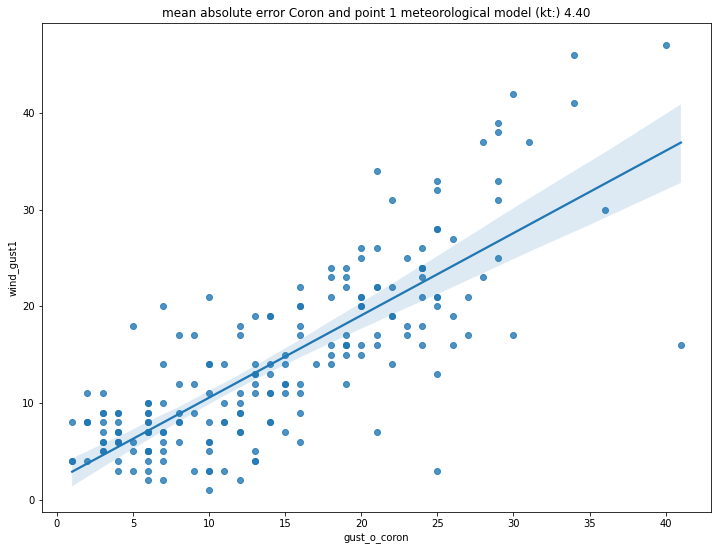

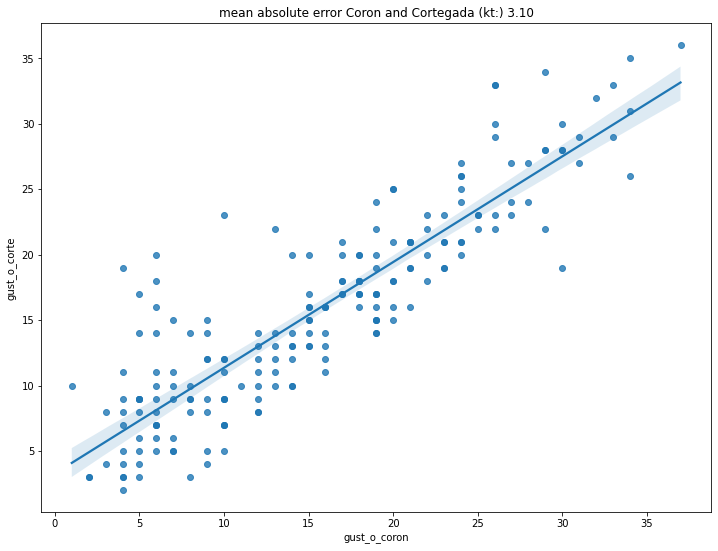

In [37]:
#@title Wind gust . Sampling method: max gust hour before

from sklearn.metrics import mean_absolute_error

#import data from cortegada, coron and meteorologic model point 1 redish.resample hour mean
corte = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Coron/station_data/cortegada.csv",usecols=["time","gust_o"], parse_dates=["time"]).set_index("time")
corte = corte.add_suffix('_corte').resample("H",label="right",closed="right").max()
coron = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Coron/station_data/coron.csv",usecols=["time","gust_o"],parse_dates=["time"]).set_index("time")
coron = coron.add_suffix("_coron").resample("H",label="right",closed="right").max()
met_model = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Coron/met_ model/lat42.58lon-8.8046p3R4KmD0.csv",
                        usecols=["wind_gust1","time"], parse_dates=["time"]).set_index("time")
met_model.drop_duplicates()

#concatenate and label
df_res = pd.concat([corte,coron,met_model],axis=1).dropna()

df_res = round(df_res*1.94384,0)




#compare Cortegada and point1 met model
mae = round(mean_absolute_error(df_res.gust_o_corte, df_res.wind_gust1),2)
plt.figure(figsize=(12, 9))
plt.title("mean absolute error Cortegada and point 1 meteorological model (kt:) {:.2f}".format(mae))
sns.regplot( y="wind_gust1", x="gust_o_corte",data=df_res.sample(200),);

#compare Coron and point1 met model
mae = round(mean_absolute_error(df_res.gust_o_coron, df_res.wind_gust1),2)
plt.figure(figsize=(12, 9))
plt.title("mean absolute error Coron and point 1 meteorological model (kt:) {:.2f}".format(mae))
sns.regplot( y="wind_gust1", x="gust_o_coron",data=df_res.sample(200),);


#compare Coron and Cortegada
mae = round(mean_absolute_error(df_res.gust_o_coron, df_res.gust_o_corte),2)
plt.figure(figsize=(12, 9))
plt.title("mean absolute error Coron and Cortegada (kt:) {:.2f}".format(mae))
sns.regplot( y="gust_o_corte", x="gust_o_coron",data=df_res.sample(200),);


In [28]:
df_res

,gust_o_corte,gust_o_coron,wind_gust1
time,,,
2018-01-01 01:00:00,17.0,17.0,22.0
2018-01-01 02:00:00,19.0,18.0,25.0
2018-01-01 03:00:00,19.0,19.0,26.0
2018-01-01 04:00:00,23.0,24.0,27.0
2018-01-01 05:00:00,22.0,23.0,28.0
...,...,...,...
2022-12-30 19:00:00,39.0,40.0,44.0
2022-12-30 20:00:00,37.0,41.0,45.0
2022-12-30 21:00:00,38.0,38.0,44.0
